In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('/content/smartphone_dataset.csv')

In [74]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [75]:
df.shape

(980, 25)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [77]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

##Top 5 brands

<Axes: xlabel='brand_name'>

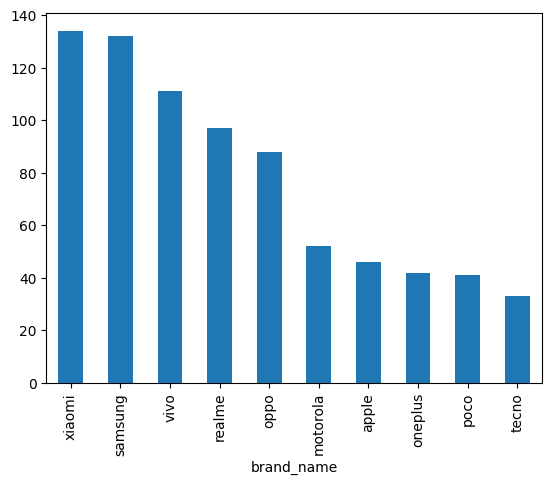

In [78]:

df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

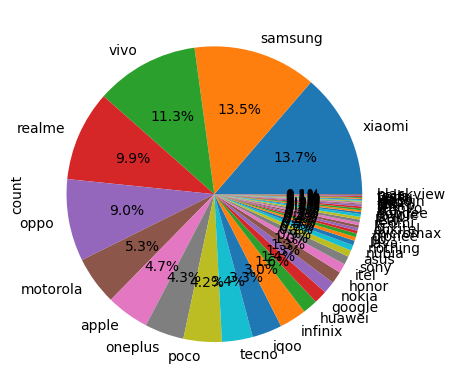

In [79]:
# pie chart
df['brand_name'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [80]:
# model
df['model'].nunique()

980

In [81]:
# price
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

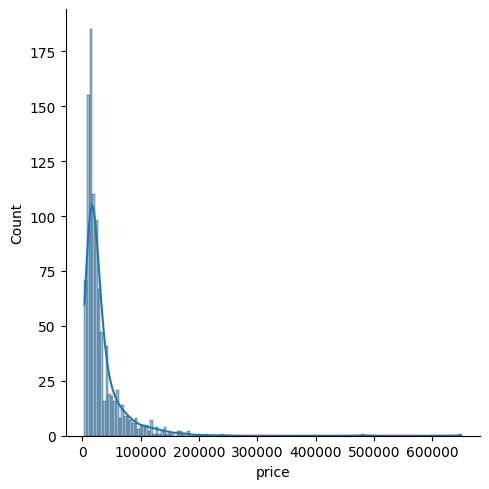

In [82]:
sns.displot(kind='hist',data=df,x='price',kde=True)

<Axes: ylabel='price'>

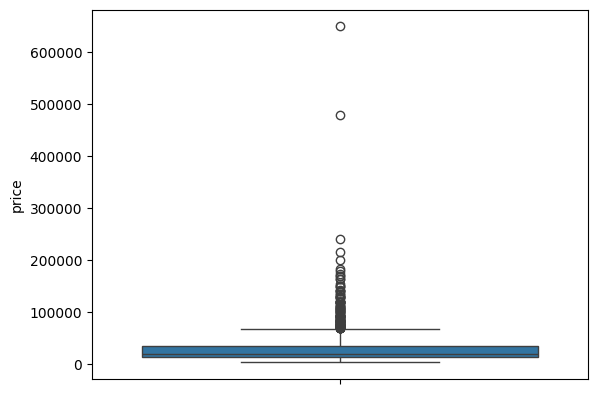

In [83]:
sns.boxplot(df['price'])

In [84]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

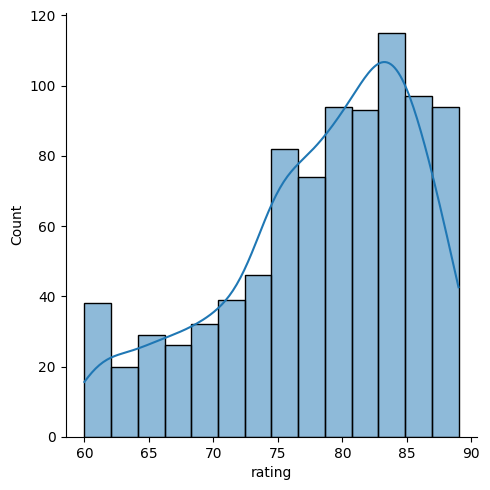

In [85]:
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [86]:
df['rating'].skew()

-0.6989993034105535

<Axes: ylabel='rating'>

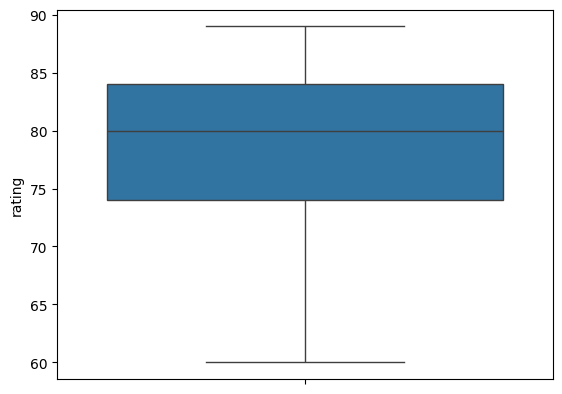

In [87]:
sns.boxplot(df['rating'])

<Axes: ylabel='count'>

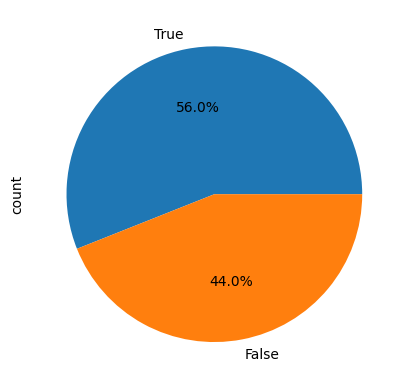

In [88]:
# has_5g
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

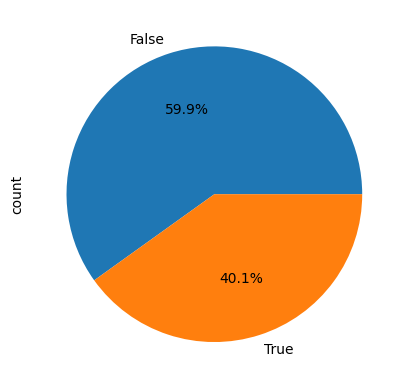

In [89]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='processor_brand'>

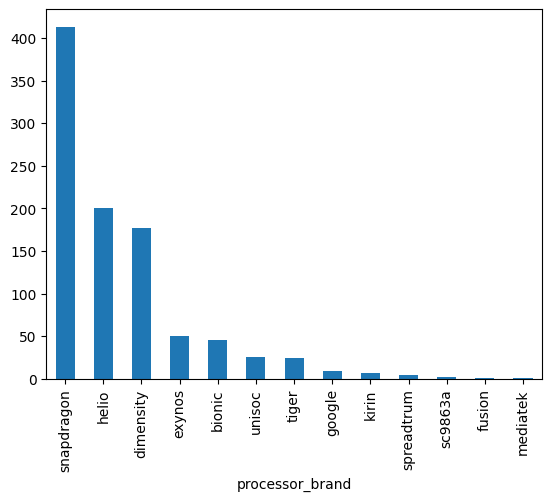

In [90]:

df['processor_brand'].value_counts().plot(kind='bar')

In [91]:
def plot_graphs(column_name):

  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df,x=column_name)

In [92]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

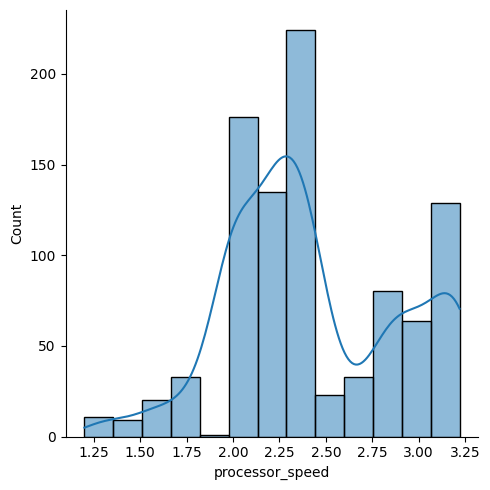

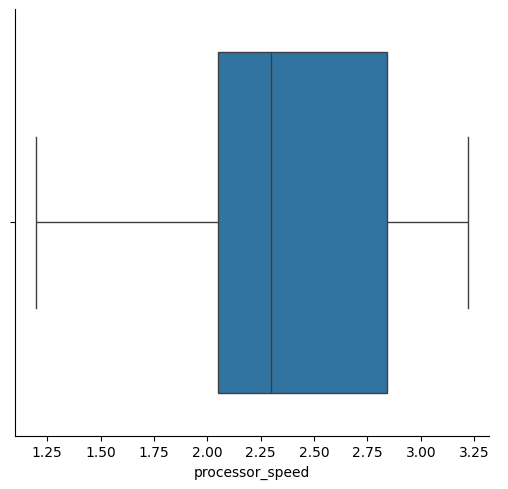

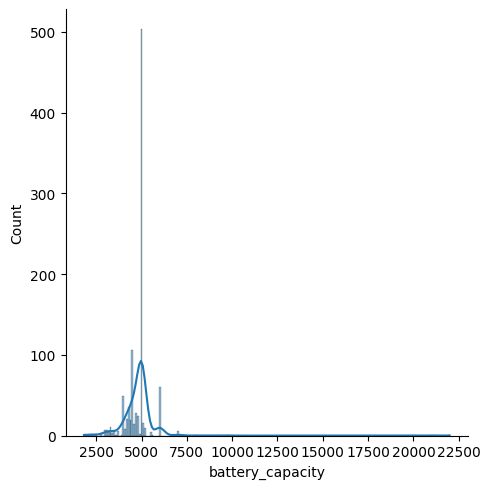

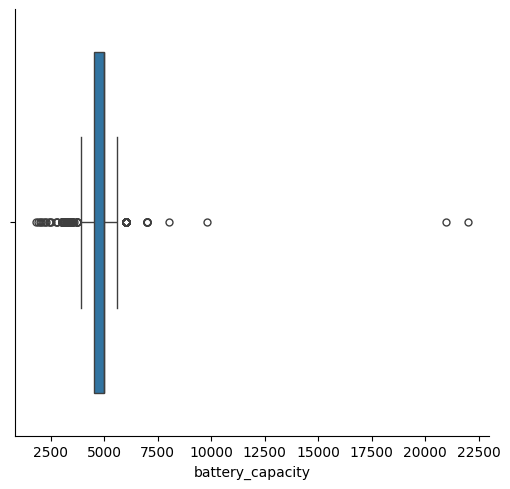

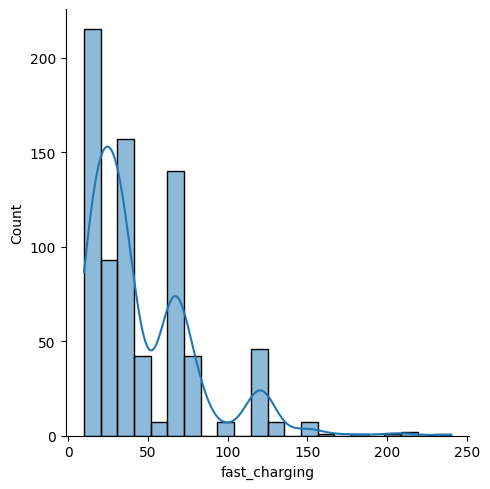

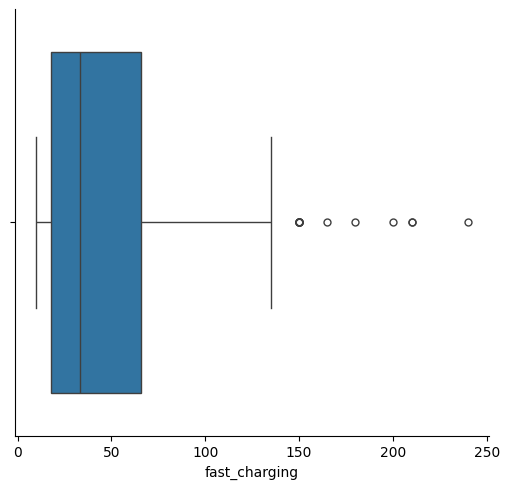

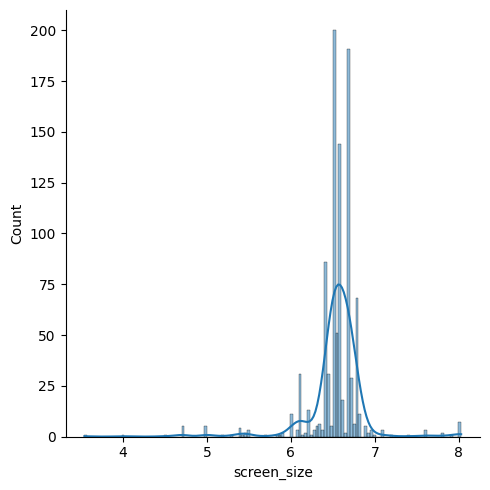

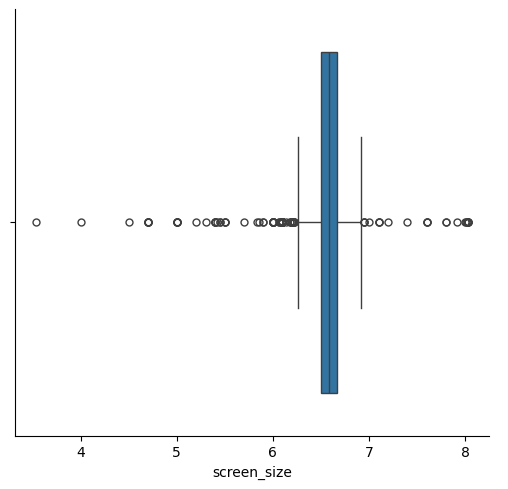

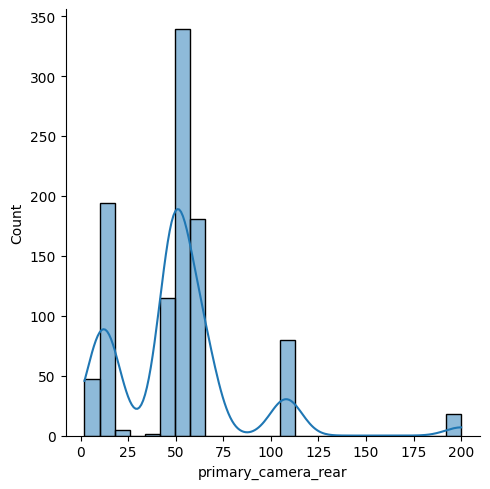

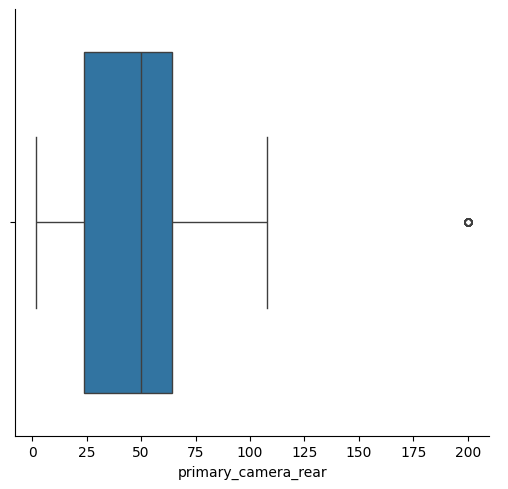

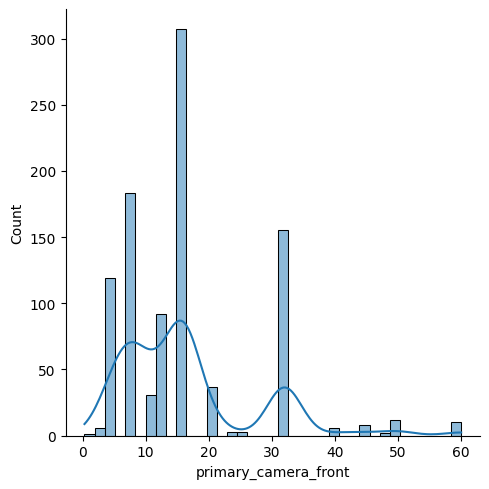

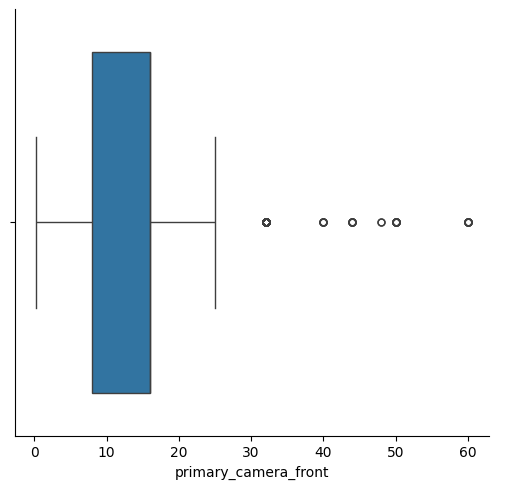

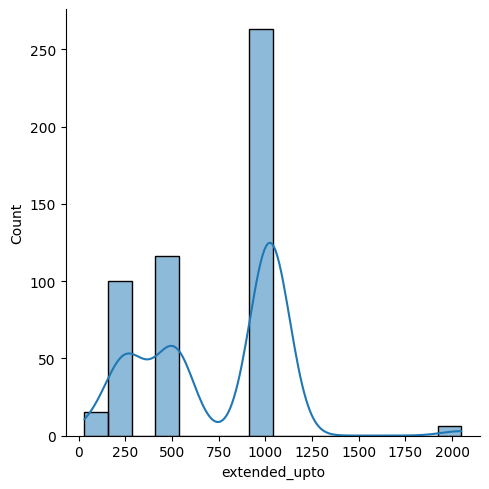

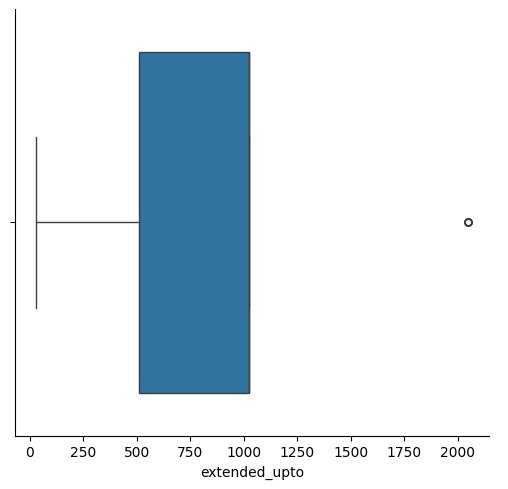

In [93]:
for col in num_columns:
  plot_graphs(col)

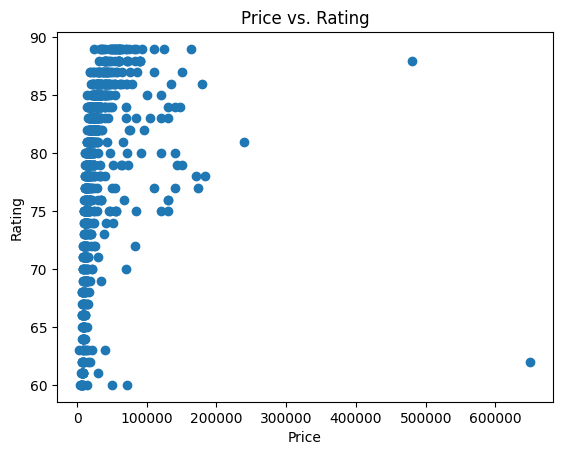

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Scatter plot (e.g., price vs. rating)
plt.scatter(numeric_df["price"], numeric_df["rating"])
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price vs. Rating")
plt.show()



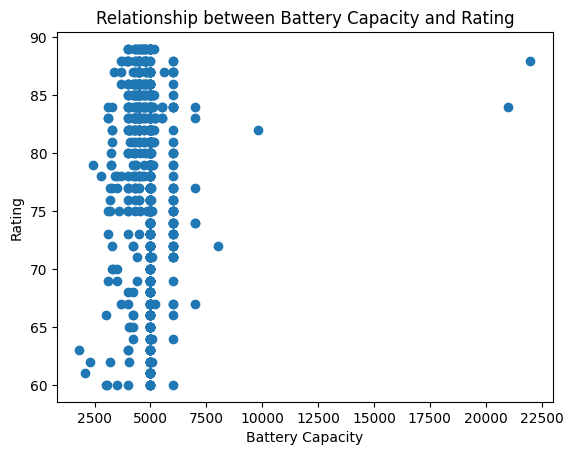

In [121]:
import matplotlib.pyplot as plt
# Analyze the relationship between battery capacity and rating.
plt.scatter(df['battery_capacity'], df['rating'])
plt.xlabel('Battery Capacity')
plt.ylabel('Rating')
plt.title('Relationship between Battery Capacity and Rating')
plt.show()

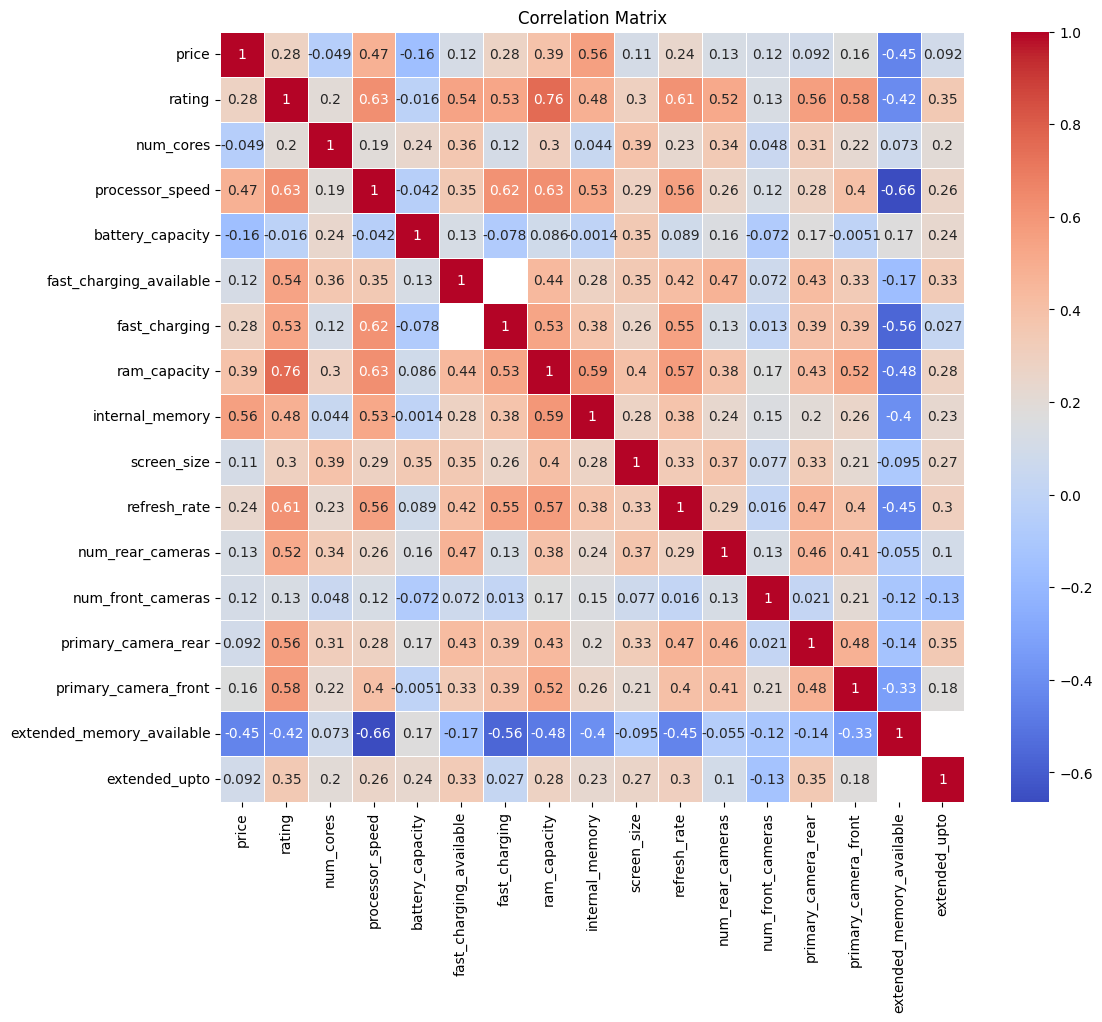

In [95]:
# Correlation matrix
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()  # Select numeric columns only

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [96]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [97]:
# prompt: remove the null value in the dataset

df.dropna(inplace=True)


In [98]:
df.isnull().sum()

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
resolution                   0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Select features and target variable
X = df[['rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear', 'primary_camera_front']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


print('Linear Regression Model')
print('Mean Squared Error:', mse)


Linear Regression Model
Mean Squared Error: 72583974.88967519


#Machine Learnig Model Apply

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [101]:
# Select features and target variable
X = df[['rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear', 'primary_camera_front']]
y = df['has_5g']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Decision Tree Classifier')
print('Accuracy:', accuracy_dt)
print('Classification Report:')
print(report)

Decision Tree Classifier
Accuracy: 0.7464788732394366
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.79      0.79        42
        True       0.69      0.69      0.69        29

    accuracy                           0.75        71
   macro avg       0.74      0.74      0.74        71
weighted avg       0.75      0.75      0.75        71



In [103]:

# Initialize and train the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Random Forest Classifier')
print('Accuracy:', accuracy_rf)
print('Classification Report:')
print(report)


Random Forest Classifier
Accuracy: 0.8591549295774648
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88        42
        True       0.85      0.79      0.82        29

    accuracy                           0.86        71
   macro avg       0.86      0.85      0.85        71
weighted avg       0.86      0.86      0.86        71



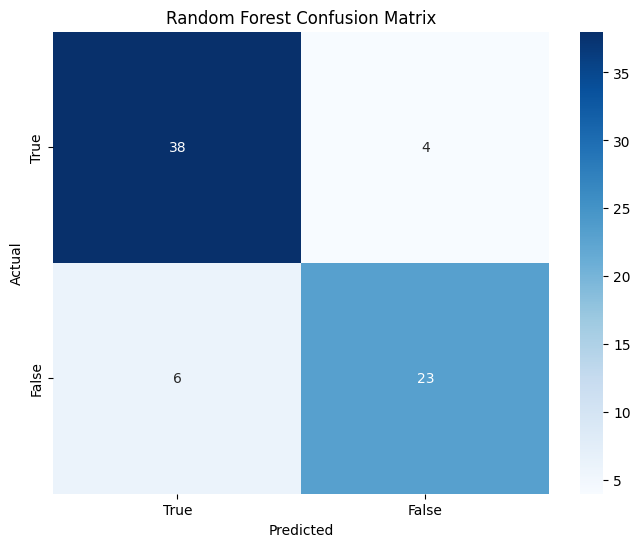

In [104]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred_rf = rf_clf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define class labels
class_labels = ['True', 'False']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [105]:
# Initialize and train the SVM classifier
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('SVM Classifier')
print('Accuracy:', accuracy_svm)
print('Classification Report:')
print(report)

SVM Classifier
Accuracy: 0.5915492957746479
Classification Report:
              precision    recall  f1-score   support

       False       0.59      1.00      0.74        42
        True       0.00      0.00      0.00        29

    accuracy                           0.59        71
   macro avg       0.30      0.50      0.37        71
weighted avg       0.35      0.59      0.44        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
# Initialize and train the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_clf.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('KNN Classifier')
print('Accuracy:', accuracy_knn)
print('Classification Report:')
print(report)


KNN Classifier
Accuracy: 0.7887323943661971
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.83      0.82        42
        True       0.75      0.72      0.74        29

    accuracy                           0.79        71
   macro avg       0.78      0.78      0.78        71
weighted avg       0.79      0.79      0.79        71



In [107]:
# Initialize and train the Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_clf.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Naive Bayes Classifier')
print('Accuracy:', accuracy_nb)
print('Classification Report:')
print(report)

Naive Bayes Classifier
Accuracy: 0.7183098591549296
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.55      0.70        42
        True       0.60      0.97      0.74        29

    accuracy                           0.72        71
   macro avg       0.78      0.76      0.72        71
weighted avg       0.81      0.72      0.71        71



<ipython-input-108-617c989ecb40>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')


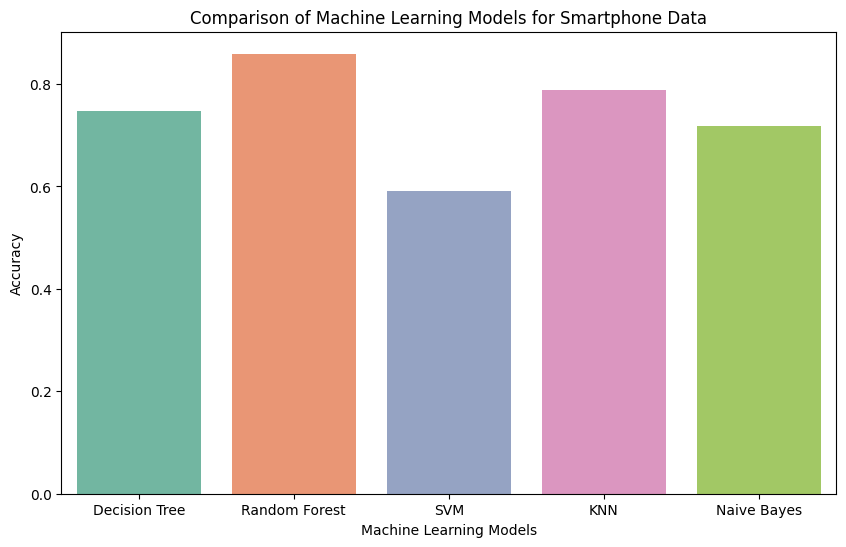

In [108]:

import matplotlib.pyplot as plt
# Prepare data for the bar chart
models = ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes']
accuracies = [accuracy_dt, accuracy_rf, accuracy_svm, accuracy_knn, accuracy_nb]

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='Set2')

# Add labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Models for Smartphone Data')

# Show the plot
plt.show()
